# [시계열팀]김동환_클린업_1주차_패키지

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and di

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 

In [4]:
from google.colab import files
file_uploaded = files.upload()

Saving insurance.csv to insurance (2).csv


## Chapter 1 : Data Preprocessing & EDA
### 문제 1. R과 Python에서 각각 데이터를 불러온 뒤, 데이터의 구조를 파악하세요.

In [5]:
import io
import pandas as pd

In [6]:
insurance = pd.read_csv(io.BytesIO(file_uploaded['insurance.csv']))
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### 문제2. 데이터에서 각 변수별로 unique한 값이 몇 개씩 존재하는지 파악해주세요.

In [10]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 문제3. 문제 1과 문제 2에서 얻어낸 정보들을 바탕으로, 데이터에서 각 변수들이 범주형 변수인지 수치형 변수인지 판단해보고, 그 이유에 대해서 간략하게 서술해주세요.


In [11]:
num_columns = insurance.select_dtypes(include=np.number).columns.tolist()
print('수치형 변수는 {}입니다.'.format(num_columns))

수치형 변수는 ['age', 'bmi', 'children', 'charges']입니다.


In [12]:
cat_columns = insurance.select_dtypes(exclude=np.number).columns.tolist()
print('범주형 변수는 {}입니다.'.format(cat_columns))

범주형 변수는 ['sex', 'smoker', 'region']입니다.


*   수치형자료 : 키, 몸무게 등 숫자형태로 측정되는 자료.
*   범주형자료 : 성별(남,여), 선호도(싫음,좋음)등,몇 개의 범주를 갖는 형태로 측정되는 자료.

### 문제4.  데이터 내에 결측치가 있는지 간단히 파악해보세요. 

In [13]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

결측치 없음.

### 문제5. 데이터에 있는 ‘age’ 변수를 바탕으로 ‘age_group’이라는 범주형 파생변수를 생성해주세요

In [14]:
#조건에 따라 age변수를 young,senior,elder 로 변경
age_to_cat=lambda x: 'young' if x>=18 and x<=35 else( 'senior' if x>=36 and x<=55 else 'elder')

In [15]:
#age_group을 기존 dataframe에 추가
age_group=pd.Series(list(map(age_to_cat,insurance['age'])))
insurance['age_group']=age_group

In [17]:
#잘 작동했나 체크
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,young
4,32,male,28.880,0,no,northwest,3866.85520,young


### 문제6. 데이터에서 수치형 변수들만을 사용하여, 수치형 변수들 간의 상관관계를 다음과 같은 상관관계 Plot을 통해 확인해주세요. 그리고 그 결과에 대해서 간단히 해석해주세요.

In [18]:
numcol_cor=insurance[num_columns].corr()

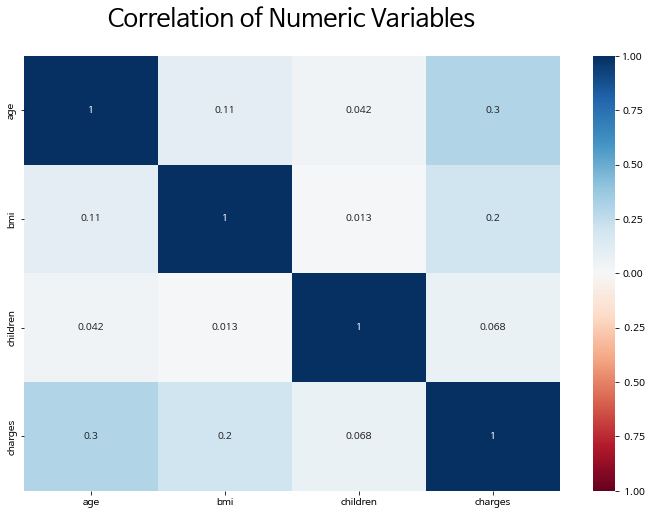

In [19]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(numcol_cor,cmap='RdBu',vmin=-1,vmax=1,annot=True)
plt.title('Correlation of Numeric Variables',fontsize=25,pad=30)
plt.show()

*   age : bmi,charges와 약한 양의 선형관계가 있다. children과 선형관계가 거의 없다.
*   bmi : age,charges와 약한 양의 선형관계가 있다. children과 선형관계가 거의 없다.
*   children : age,bmi,charges와 선형관계가 거의 없다.
*   charges : age,bmi와 약한 양의 선형관계가가 있다. chlidren과 선형관계가 거의 없다.




### 문제6의 보너스문제1.  문제5에서는 수치형 변수들에 대해서만 상관관계 Plot을 그려보았지만, 범주형 자료들에 대해서도 상관계수를 계산할 수 있는 방법이 있습니다. 해당 방법에 대하여 조사해 본 후,그 내용에 대해서 간단히 요약해서 서술하고, 수치형 변수때와 마찬가지로 범주형 자료들 간의 상관관계를 상관관계 Plot을 통해 확인해주세요.



*   범주형 변수들 간의 상관관계를 계산하기 위해서는 일반적으로 Cramer's V라는 방법이 이용됨. Cramer's V는 피어슨 카이제곱검정을 통해 도출된 카이제곱통계량을 토대로 상관계수를 계산하는 방법임.
*   Cramer's V 계수는 0과 1 사이의 값을 가지며, 값이 0이라면 두 변수 간에는 아무런 상관관계가 없다는 것을, 값이 1이라면 두 변수 간에는 완벽한 상관관계가 있다는 것을 나타냄냄.



In [20]:
from scipy import stats
import numpy as np

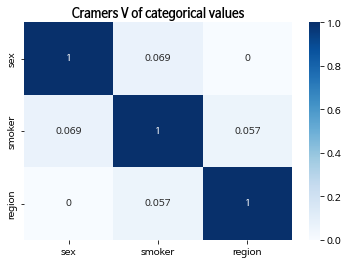

In [23]:
cat_df=insurance[cat_columns]
#carmers v 계산 함수
def cramers_v(x, y):
    #교차표 만들기
    confusion_matrix = pd.crosstab(x, y)
    #카이제곱값 계산하기
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    #phi2값을 보정, phi2가 음수일 경우는 0으로 처리
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    #carmers v반환
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_matrix = np.array([[cramers_v(cat_df[column1], cat_df[column2]) for column1 in cat_columns] for column2 in cat_columns])
cramers_v_df = pd.DataFrame(cramers_v_matrix, columns=cat_columns, index=cat_columns)
sns.heatmap(cramers_v_df, annot=True, cmap='Blues')
plt.title('Cramers V of categorical values' ,fontweight='bold')
plt.show()

### 문제7. 흡연 여부(smoker)에 따른 요금(charges)의 분포를 각각 비흡연자(smoker==no), 흡연자(smoker==yes)로 나누어서 다음과 시각화해주세요. 그 후, 그려진 plot을 통해 알 수 있는 점들을 간략하게 적어주세요.

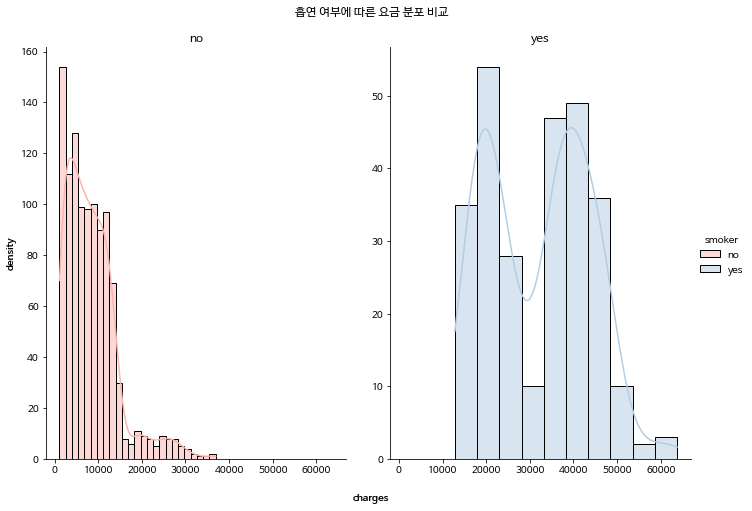

In [25]:
#변수 별 색상 팔렛트 지정
my_palette={'no':sns.color_palette('Pastel1')[0],'yes':sns.color_palette('Pastel1')[1]}
g = sns.FacetGrid(data=insurance, hue='smoker',col_order=["no", "yes"],col='smoker',sharey=False,palette=my_palette,aspect=0.7,height=7)
g.map(sns.histplot, 'charges', kde=True)
#제목이랑 겹치지 않게 subplot위치 조정
plt.subplots_adjust(top=0.9)
#범례 추가
g.add_legend(title='smoker',label_order=['no','yes'])
#전체제목과 subplots의 제목
g.fig.suptitle('흡연 여부에 따른 요금 분포 비교',ha='center')
g.axes[0,0].set_title('no')
g.axes[0,1].set_title('yes')
#xlabel,ylabel 설정
g.set_axis_labels('', 'density',fontweight='bold')
g.fig.text(0.5,0.0,'charges',ha='center',weight='bold')
plt.show()



*   흡연자에 비해 비흡연자는 보험료가 낮은 쪽에 많이 분포해 있다.
*   평균적으로 비흡연자가 흡연자보다 보험료를 적게 낸다.



### 문제8. 나이 그룹(age_group)에 따른 평균 요금(charge)의 차이를 확인하기 위해 박스 플롯을 그려 다음과 같이 시각화해주세요. 그 후, 그림을 통해 확인할 수 있는 점을 간략하게 적어주세요.

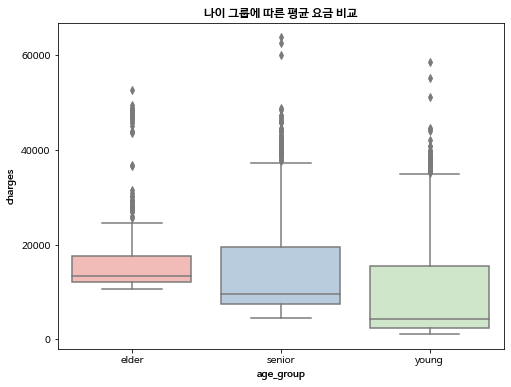

In [26]:
fig=plt.figure(figsize=(8,6))
sns.set_palette('Pastel1')
#boxplot그리기
sns.boxplot(x='age_group',y='charges',data=insurance,order=['elder','senior','young'])
#제목,label,그래프 눈금 설정정
plt.title('나이 그룹에 따른 평균 요금 비교',fontweight='bold')
plt.xlabel('age_group',weight='bold')
plt.ylabel('charges',weight='bold')
plt.yticks(range(0,64000,20000))
plt.show()



*   elder,senior,young 순으로 중앙값이 커지는 것을 보아 나이가 많아질수록 보험료가 높아진다는 것을 시각적으로 확인할 수 있음.
*   각 그룹에서 이상치가 보임, 특히 elder그룹에서 매우 많은 보험료를 지불하는 표본이 상대적으로 많을 것을 보아, 이 연령대에서는 보험료 차이가 크게 벌어지는 경우가 많을 것으로 볼 수 있음.

## Chapter 2 : ANOVA(ANalysis Of Variance, 분산분석)
### 문제1. ANOVA가 어떤 모델인지 조사해본 후, ANOVA가 어떤 모델인지에 대해서 간단히 서술해주세요.

ANOVA는 2개 이상의 그룹 간 차이가 있는 지를 평균값 차이를 비교하는 데 사용되는 모델

*   ANOVA는 2개 이상의 그룹 간 차이가 있는 지를 평균값 차이를 비교하는 데 사용되는 모델로 그 차이가 유의한지 여부를 검정함.
*   ANOVA를 통해 알아내고자 하는 점은 그룹 간의 차이가 있는지 또 그 정도는 어느 정도인지를 파악하는 것임.
*   이 test의 귀무가설은 모든 그룹의 평균이 동일하다는 것이고 대립가설은 적어도 하나의 그룹은 다른 그룹과 동일하지 않다는 것임.
*   Z-test 혹은 T-test는 두 그룹 간의 차이만을 비교 할 수 있는데, 그에 따라 그 이상의 그룹들을 비교하기 위해서는 test를 여러번 반복해서 진행해야함. 이 경우, 여러번의 test를 수행하게 됨으로, 검정 결과에 대한 오류가 높아 질 수 있음.



### 문제2. ANOVA를 사용하여 나이 그룹(age_group) 간의 평균 요금(charges) 차이가 있는지를 검정해보고, 이를 ANOVA표를 통해 검정 결과를 해석하세요.

In [27]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [28]:
#모델생성
model= ols('charges~C(age_group)',insurance).fit(alpha=0.05)
print(anova_lm(model))

                  df        sum_sq       mean_sq          F        PR(>F)
C(age_group)     2.0  1.498926e+10  7.494631e+09  55.252143  8.826862e-24
Residual      1335.0  1.810850e+11  1.356442e+08        NaN           NaN




*   age_group에 따라 charges에 유의미한 차이가 있음을 확인 할 수 있다. 
*    p-value가 매우 작음으로 유의 수준 alpha=0.05에서 귀무가설(age_group별 charges에 차이가 없다.)를 기각할 수 있다.



### 문제3. ANOVA를 사용하여 나이 그룹(age_group) 간의 평균 BMI 값에 차이가 있는지를 검정해보고, 이를 ANOVA표를 통해 검정 결과를 해석하세요.

In [29]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group'],
      dtype='object')

In [30]:
model = ols('bmi~C(age_group)',insurance,).fit(alpha=0.05)
print(anova_lm(model))

                  df        sum_sq     mean_sq         F    PR(>F)
C(age_group)     2.0    439.195123  219.597562  5.948798  0.002679
Residual      1335.0  49281.005263   36.914611       NaN       NaN


*   age_group에 따라 bmi에 유의미한 차이가 있음을 확인 할 수 있다. 
*    p-value가가 0.05보다 작음으로 유의수준 alpha=0.05에서서 귀무가설(age_group별 bmi에 차이가 없다.)를 기각할 수 있다.

### 문제4. ANOVA를 사용하여 지역(region) 간의 평균 나이(age)의 차이가 있는지를 검정해보고, 이를 ANOVA표를 통해 검정 결과를 해석하세요.

In [31]:
model = ols('age~C(region)',insurance).fit(alpha=0.05)
print(anova_lm(model))

               df         sum_sq     mean_sq         F    PR(>F)
C(region)     3.0      47.344743   15.781581  0.079782  0.970989
Residual   1334.0  263878.309219  197.809827       NaN       NaN


*   region에 따라 age에 유의미한 차이가 없음을 확인 할 수 있다. 
*   p-value가 매우 높기 때문에 유의수준 alpha=0.05에서 귀무가설(region별 age에 차이가 없다.)를 기각할 수 없다.

### 문제4의 보너스 문제2.  ANOVA 또한 선형 회귀 모델과 같이 기본적인 모델의 가정이 존재할 것입니다. ANOVA 모델의 기본적인 가정에 대해서 살펴본 후, 이를 Plot이나 검정 등을 통해 확인 할 수 있는 방법을 찾아 설명해보세요.



ANOVA의 기본적인 가정은 다음과 같다.
1.   독립성 : 각 그룹이 서로 독립적이다.
2.   등분산성 : 각 그룹 내에서의 분산은 모두 동일하다.
3.   정규성 : 각 그룹 내에서의 관측치는 정규 분포를 따라야 한다.

독립성 가정은 실험을 통해 증명하기는 일반적으로 어렵지만, 실제 데이터를 수집할 대다수의 경우에 일반적으로 이 가정이 충족된다.

등분산성 가정은 박스플롯을 통해 대강 확인해 볼 수 있다. 박스 플롯에서 각 그룹의 박스의 크기가 비슷하다면 위 가정을 충족했다고 할 수 있다.

정규성 가정은 qqplot을 이용할 수 있다. 만약 정규분포를 따른다면 qqplot은 대략적으로 직선에 가깝게 나타난다.


문제4의 보너스 문제3.ANOVA는 단순히 하나의 요인에 대한 평균 값들의 차이만을 검정할 수 있는 것이 아니라
(One Way ANOVA), 2개 이상의 요인에 대한 평균 값들의 차이에 대해서도 검정할 수 있습
니다. Two Way ANOVA에 대해서 조사해본 후, 나이 그룹(age_group)과 흡연여부
(smoker)에 따라 평균 요금(charge)에 차이가 있는지 확인해보세요.

In [32]:
model=ols('charges~C(age_group)+C(smoker)+C(age_group):C(smoker)',insurance).fit(alpha=0.05)
print(anova_lm(model,typ=2))

                              sum_sq      df            F        PR(>F)
C(age_group)            1.667833e+10     2.0   192.305426  4.249708e-74
C(smoker)               1.232090e+11     1.0  2841.262866  0.000000e+00
C(age_group):C(smoker)  1.149365e+08     2.0     1.325247  2.660874e-01
Residual                5.776106e+10  1332.0          NaN           NaN




1.   age_group과 smoker간에 유의한 상호작용 효과가 없다.
2.   age_group에 따라 charges에 유의한 차이가 있다.
3.   smoker에 따라 charges에 유의한 차이가 있다.

